# 1. Library

In [222]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 2. Data

In [223]:
train_df = pd.read_csv('/data/ephemeral/home/yusol/yusol_workspace/train_data_dropna.csv', index_col=0)
test_df = pd.read_csv('/data/ephemeral/home/yusol/yusol_workspace/test_data_dropna.csv', index_col=0)

# 누락되었던 close ,volume 열을 train_df에 추가 
train_df_price = pd.read_csv('/data/ephemeral/home/yusol/yusol_workspace/train_df_price.csv', index_col = 0)
train_df = pd.concat([train_df, train_df_price], axis=1) # 기존 train_df에 추가

print('train_df.shape: ', train_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (8760, 209)
test_df.shape:  (2792, 207)


## 2-1. Group Columns

In [224]:
# ID, target 칼럼을 제외한 나머지 칼럼을 그룹으로 분류
addresses_columns = [col for col in train_df.columns if 'addresses' in col]
block_columns = [col for col in train_df.columns if 'block-' in col]
blockreward_columns = [col for col in train_df.columns if 'blockreward' in col]
difficulty_columns = [col for col in train_df.columns if 'difficulty' in col]
fees_columns = [col for col in train_df.columns if 'fees' in col]
hashrate_columns = [col for col in train_df.columns if 'hashrate' in col]
supply_columns = [col for col in train_df.columns if 'supply_supply' in col]
tokens_columns = [col for col in train_df.columns if 'tokens' in col]
transactions_columns = [col for col in train_df.columns if 'transactions' in col]
utxo_columns = [col for col in train_df.columns if 'utxo' in col]
velocity_columns = [col for col in train_df.columns if 'velocity' in col]
premium_columns = [col for col in train_df.columns if 'premium' in col]
funding_rates_columns = [col for col in train_df.columns if 'funding_rates' in col]
long_liquidation_columns = [col for col in train_df.columns if 'long_liquidation' in col]
short_liquidation_columns = [col for col in train_df.columns if 'short_liquidation' in col]
open_interest_columns = [col for col in train_df.columns if 'open_interest' in col]
taker_columns = [col for col in train_df.columns if 'taker' in col]
price_columns = [col for col in train_df.columns if 'price' in col]

In [225]:
# 총 18개의 변수 그룹을 리스트로 저장 
columns_groups_list = [
    addresses_columns, block_columns, blockreward_columns,
    difficulty_columns, fees_columns, hashrate_columns,
    supply_columns, tokens_columns, transactions_columns, 
    utxo_columns, velocity_columns, premium_columns,
    funding_rates_columns, long_liquidation_columns, short_liquidation_columns, 
    open_interest_columns, taker_columns, price_columns
]

변수명 예시:'hourly_market-data_open-interest_all_exchange_all_symbol_open_interest'<br>




| TABLE_NAME                                             | COLUMN_NAME               | 의미                                          |
|--------------------------------------------------------|---------------------------|----------------------------------------------|
| 모든 테이블                                               | datetime                  | 데이터가 쌓인 시간                                |
| HOURLY_NETWORK-DATA_ADDRESSES-COUNT                    | addresses_count_active    | 고유한 활성 주소의 총 수, 발신자와 수신자를 모두 포함함   |
| HOURLY_NETWORK-DATA_ADDRESSES-COUNT                    | addresses_count_sender    | 발신자로서 활동한 주소의 수                         |
| HOURLY_NETWORK-DATA_ADDRESSES-COUNT                    | addresses_count_receiver  | 수신자로서 활동한 주소의 수                         |
| HOURLY_NETWORK-DATA_BLOCK-BYTES                        | block_bytes               | 생성된 모든 블록의 평균 크기(바이트)                 |
| HOURLY_NETWORK-DATA_BLOCK-COUNT                        | block_count               | 주어진 시간대에 생성된 블록의 수                    |
| HOURLY_NETWORK-DATA_BLOCK-INTERVAL                     | block_interval            | 생성된 블록 사이의 평균 시간(초)                    |
| HOURLY_NETWORK-DATA_BLOCKREWARD                        | blockreward               | 보상의 총합(마이닝 또는 스테이킹 보상 및 거래 수수료 포함)|
| HOURLY_NETWORK-DATA_DIFFICULTY                         | difficulty                | 새로운 블록을 마이닝하는 데 필요한 평균 난이도          |
| HOURLY_NETWORK-DATA_FEES-TRANSACTION                   | fees_transaction_mean     | 거래당 평균 수수료                               |
| HOURLY_NETWORK-DATA_FEES-TRANSACTION                   | fees_transaction_median   | 거래당 중앙값 수수료                              |
| HOURLY_NETWORK-DATA_FEES                               | fees_block_mean           | 블록당 평균 수수료                               |
| HOURLY_NETWORK-DATA_FEES                               | fees_total                | 코인 마이너들에게 지불된 모든 수수료의 합계            |
| HOURLY_NETWORK-DATA_FEES                               | fees_reward_percent       | 총 블록 보상 중 수수료의 백분율, 값은 0과 1 사이      |
| HOURLY_NETWORK-DATA_HASHRATE                           | hashrate                  | 네트워크 내 모든 채굴자들이 초당 계산하는 해시의 평균     |
| HOURLY_NETWORK-DATA_SUPPLY                             | supply_total              | 코인의 총 공급량                                 |
| HOURLY_NETWORK-DATA_SUPPLY                             | supply_new                | 새로 발행된 코인의 총합                           |
| HOURLY_NETWORK-DATA_TOKENS-TRANSFERRED                 | tokens_transferred_total  | 전송된 코인의 총 수                               |
| HOURLY_NETWORK-DATA_TOKENS-TRANSFERRED                 | tokens_transferred_mean   | 거래당 전송된 코인의 평균                          |
| HOURLY_NETWORK-DATA_TOKENS-TRANSFERRED                 | tokens_transferred_median | 거래당 전송된 코인의 중앙값                         |
| HOURLY_NETWORK-DATA_TRANSACTIONS-COUNT                 | transactions_count_total  | 전송된 토큰의 이체 여부에 관계없이 총 거래 수           |
| HOURLY_NETWORK-DATA_TRANSACTIONS-COUNT                 | transactions_count_mean   | 블록당 평균 거래 수                               |
| HOURLY_NETWORK-DATA_UTXO-COUNT                         | utxo_count                | 특정 지점에서 존재하는 사용되지 않은 거래 출력의 총 수     |
| HOURLY_NETWORK-DATA_VELOCITY                           | velocity_supply_total     | 네트워크에서 전송되는 자산의 속도                     |
| HOURLY_MARKET-DATA_COINBASE-PREMIUM-INDEX              | coinbase_premium_gap      | Coinbase 가격과 바이낸스 가격 간의 격차              |
| HOURLY_MARKET-DATA_COINBASE-PREMIUM-INDEX              | coinbase_premium_index    | Coinbase 가격과 바이낸스 가격 간의 백분율 차이         |
| HOURLY_MARKET-DATA_FUNDING-RATES_{EXCHANGES}           | funding_rates             | 매 8시간마다 결정하는 자금 비율에 비해 분 단위 자금 비율   |
| HOURLY_MARKET-DATA_LIQUIDATIONS_{EXCHANGES}_{SYMBOL}   | long_liquidations         | long_liquidations 수                           |
| HOURLY_MARKET-DATA_LIQUIDATIONS_{EXCHANGES}_{SYMBOL}   | short_liquidations        | short_liquidation 수                           |
| HOURLY_MARKET-DATA_OPEN-INTEREST_{EXCHANGES}_{SYMBOL}  | open_interest             | 거래 페어에 현재 존재하는 롱 포지션과 숏 포지션의 수       |
| HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_{ALL_EXCHANGE} | taker_buy_volume          | 무기한 스왑에서 테이커들이 충족한 매수 주문의 총 거래량     |
| HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_{ALL_EXCHANGE} | taker_sell_volume         | 무기한 스왑에서 테이커들이 충족한 매도 주문의 총 거래량     |
| HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_{ALL_EXCHANGE} | taker_buy_ratio           | 테이커들의 매수 주문량을 무기한 스왑의 총 거래량으로 나눈 값 |
| HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_{ALL_EXCHANGE} | taker_sell_ratio          | 테이커들의 매도 주문량을 무기한 스왑의 총 거래량으로 나눈 값 |
| HOURLY_MARKET-DATA_TAKER-BUY-SELL-STATS_{ALL_EXCHANGE} | taker_buy_sell_ratio      | 무기한 스왑 거래에서 테이커들의 매수 거래량 / 매도 거래량   |

# 3. 피처 엔지니어링

## 3-1. 날짜 피처 추가

In [226]:
# 날짜관련 피처 생성 함수
def make_date_features(df, date_column):
    """
    날짜 관련 피처를 생성하는 함수
    
    Parameters:
    - df: 날짜 컬럼을 포함하는 데이터프레임
    - date_column: 날짜 정보가 담긴 열 이름
    
    Returns:
    - 날짜 관련 피처가 추가된 데이터프레임
    """
    df[date_column] = pd.to_datetime(df[date_column])  # 날짜 형식으로 변환
    df['year'] = df[date_column].dt.year  # 연도 추출
    df['month'] = df[date_column].dt.month  # 월 추출
    df['week'] = df[date_column].dt.isocalendar().week  # 주(week) 추출
    df['day_of_week'] = df[date_column].dt.dayofweek  # 요일 추출
    df['hour'] = df[date_column].dt.hour  # 시간 추출

    date_columns = [date_column, 'year', 'month', 'week', 'day_of_week', 'hour']
    
    return df, date_columns

# 적용 
train_df, date_columns = make_date_features(train_df, 'ID') # 날짜피처가 추가된 데이터프레임, 추가된 날짜피처 그룹 리스트
columns_groups_list.append(date_columns) # 변수 그룹에 새 피처 추가 

## 3-2. Open Interest 관련 피처 엔지니어링

### (1) 수많은 open-interest 변수들 중 _deribit_btc_usd_open_interest 의 시간에 따른 경향성을 시각화함 

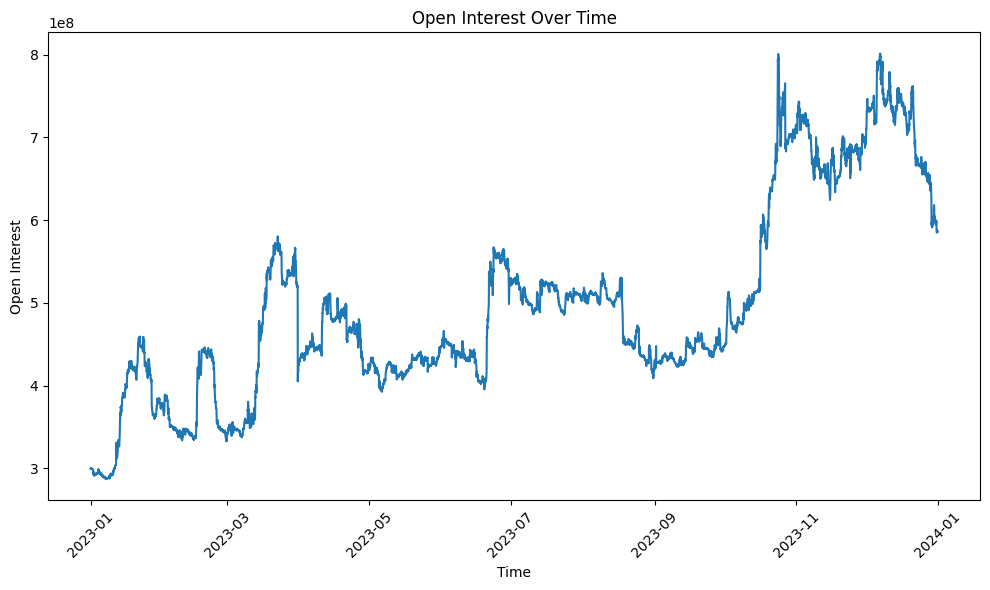

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ID', y='hourly_market-data_open-interest_deribit_btc_usd_open_interest', data=train_df)
plt.title('Open Interest Over Time')
plt.xlabel('Time')
plt.ylabel('Open Interest')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### (2) open-interest관련 열들과 close의 관계를 시각화해보자

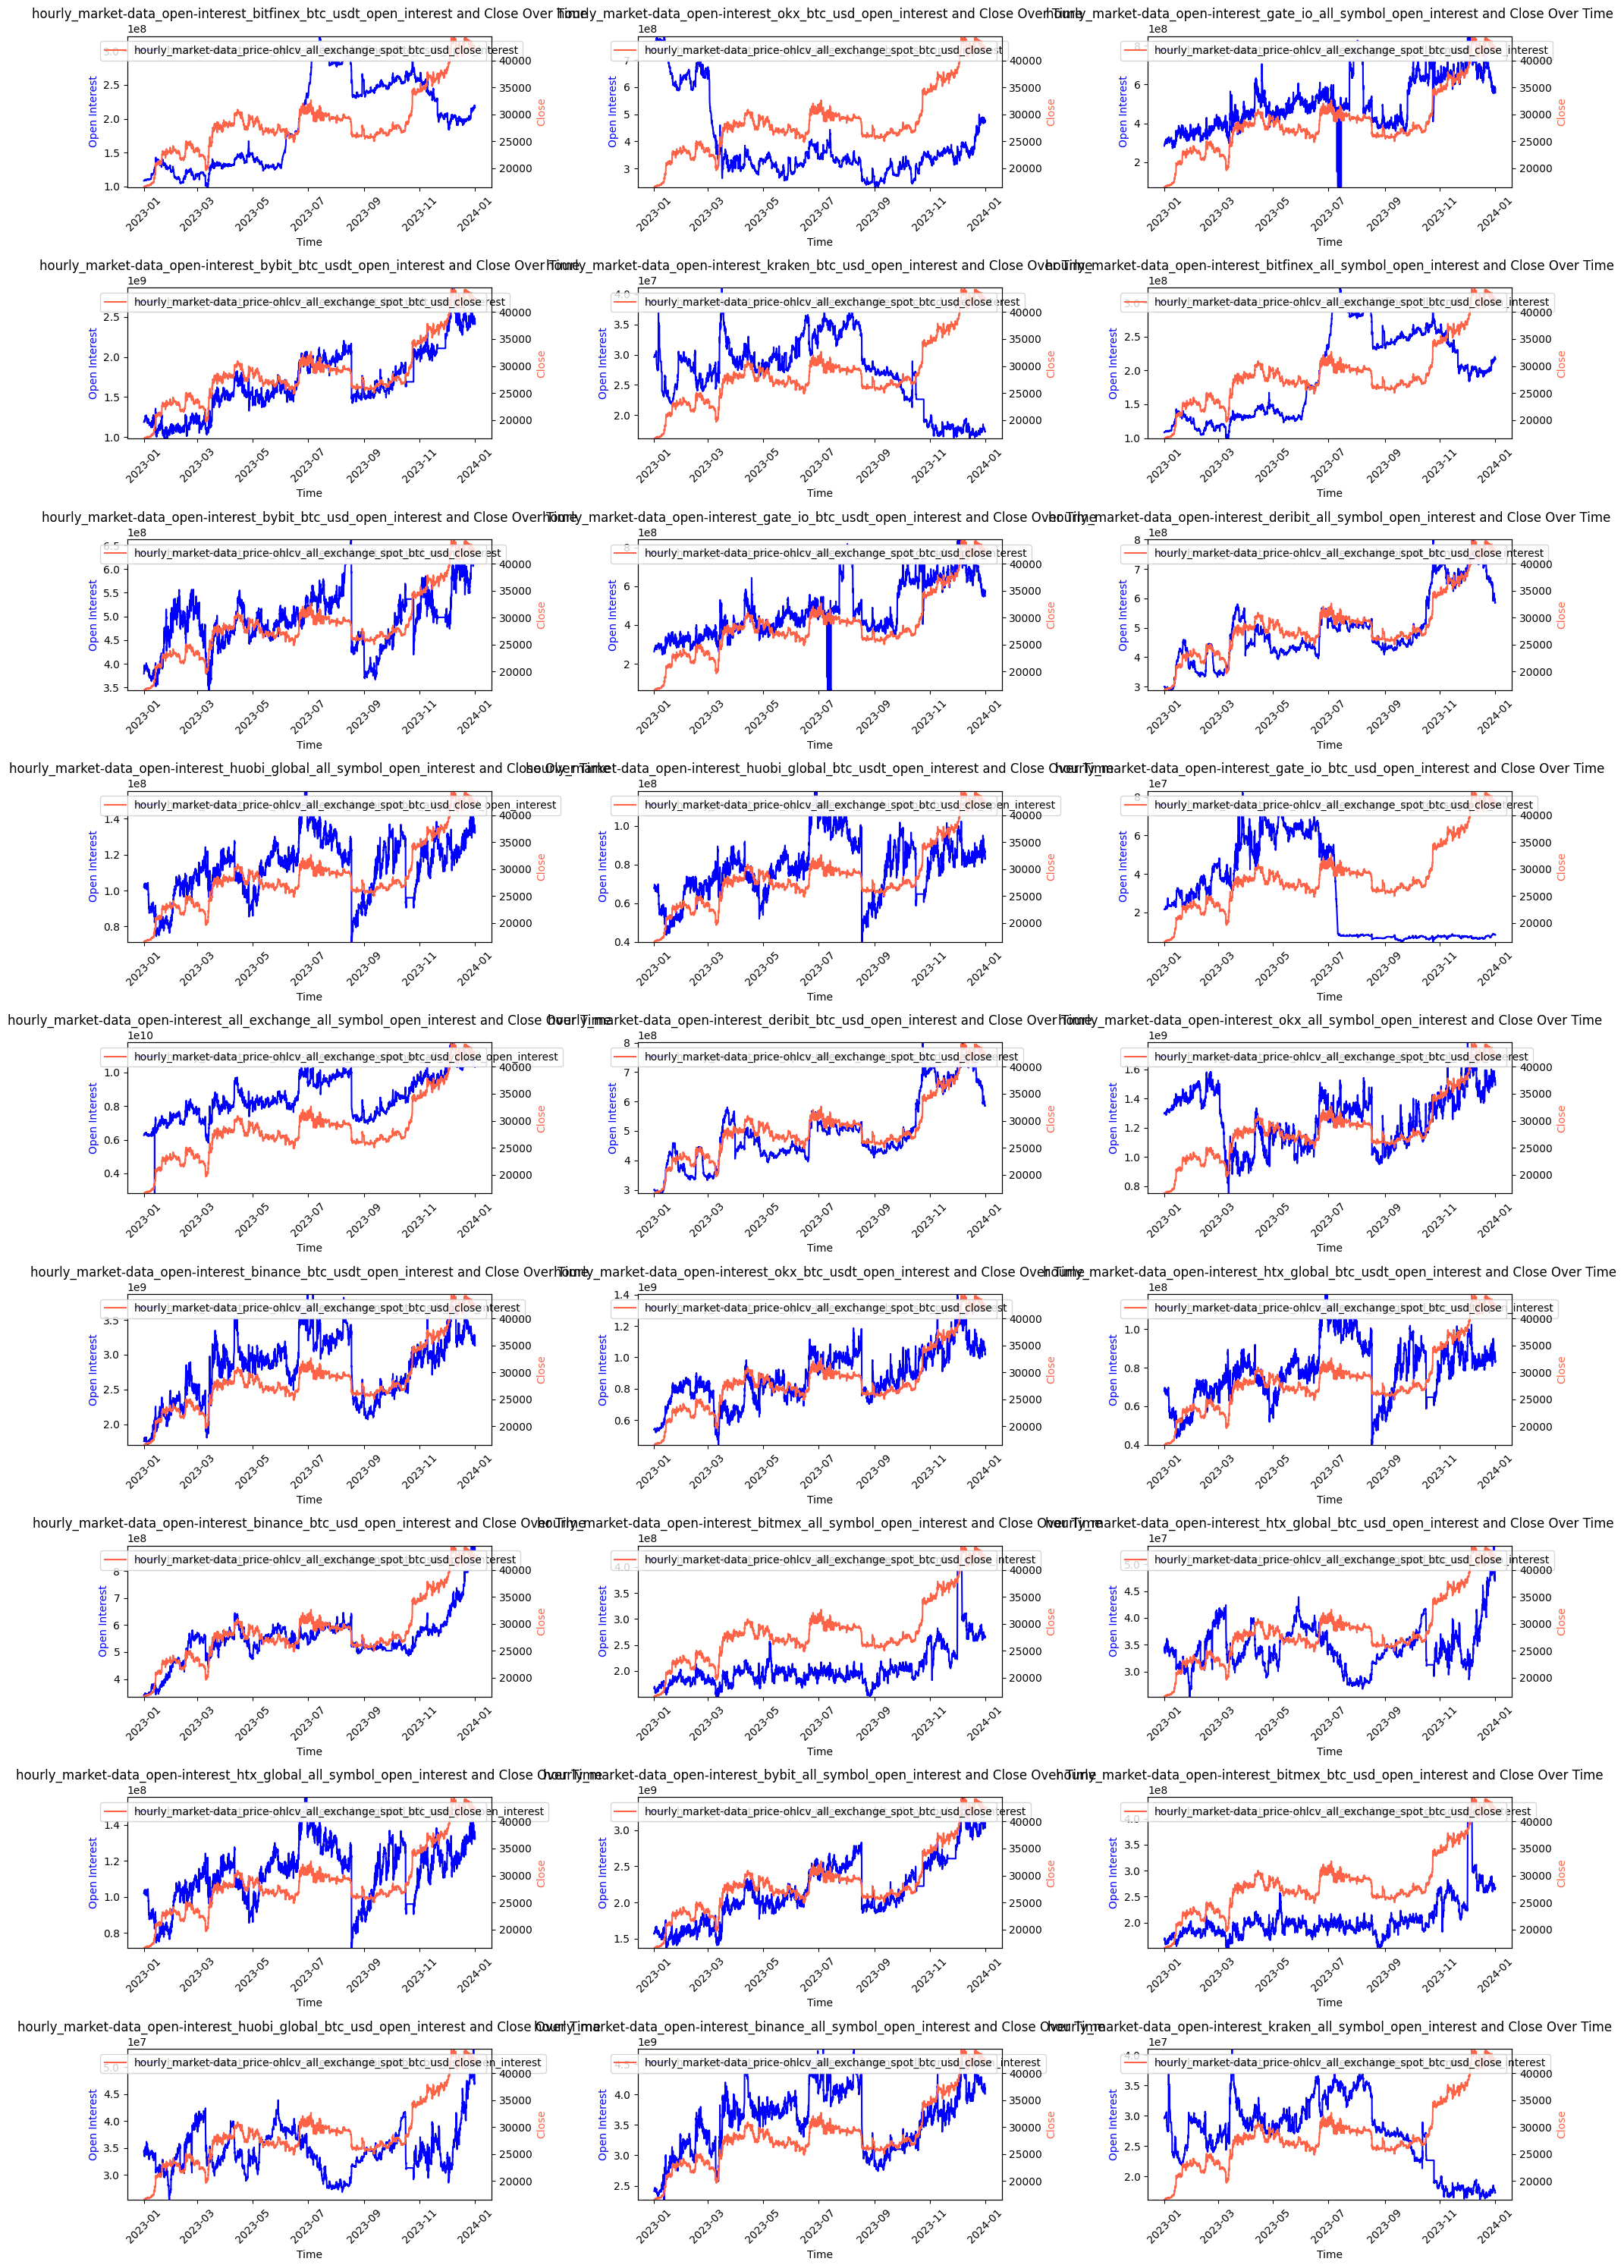

In [11]:
# 서브플롯 설정
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for ax, col in zip(axes, open_columns):
    sns.lineplot(x='ID', y=col, data=train_df, ax=ax, label=col, color='blue')  # 첫 번째 변수 그리기
    
    ax2 = ax.twinx()
    sns.lineplot(x='ID', y=price_columns[0], data=train_df, ax=ax2, color='tomato', label=price_columns[0])
    
    ax.set_ylim([train_df[col].min(), train_df[col].max()])  # 첫 번째 축의 범위 설정
    ax2.set_ylim([train_df[price_columns[0]].min(), train_df[price_columns[0]].max()])  # 두 번째 축의 범위 설정
    
    ax.set_title(f'{col} and Close Over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Open Interest', color='blue')
    ax2.set_ylabel('Close', color='tomato')
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 


**<font color = 'forestgreen'>유관해보이는 피처들</font>**<br>
1. hourly_market-data_open-interest_all_exchange_all_symbol_open_interest
2. hourly_market-data_open-interest_bybit_btc_usdt_open_interest
3. hourly_market-data_open-interest_bitfinex_btc_usdt_open_interest
4. hourly_market-data_open-interest_deribit_btc_usd_open_interest
5. hourly_market-data_open-interest_bybit_all_symbol_open_interest
6. hourly_market-data_open-interest_deribit_all_symbol_open_interest

### (3) open-interest관련 열들과 volume의 관계를 살펴보자

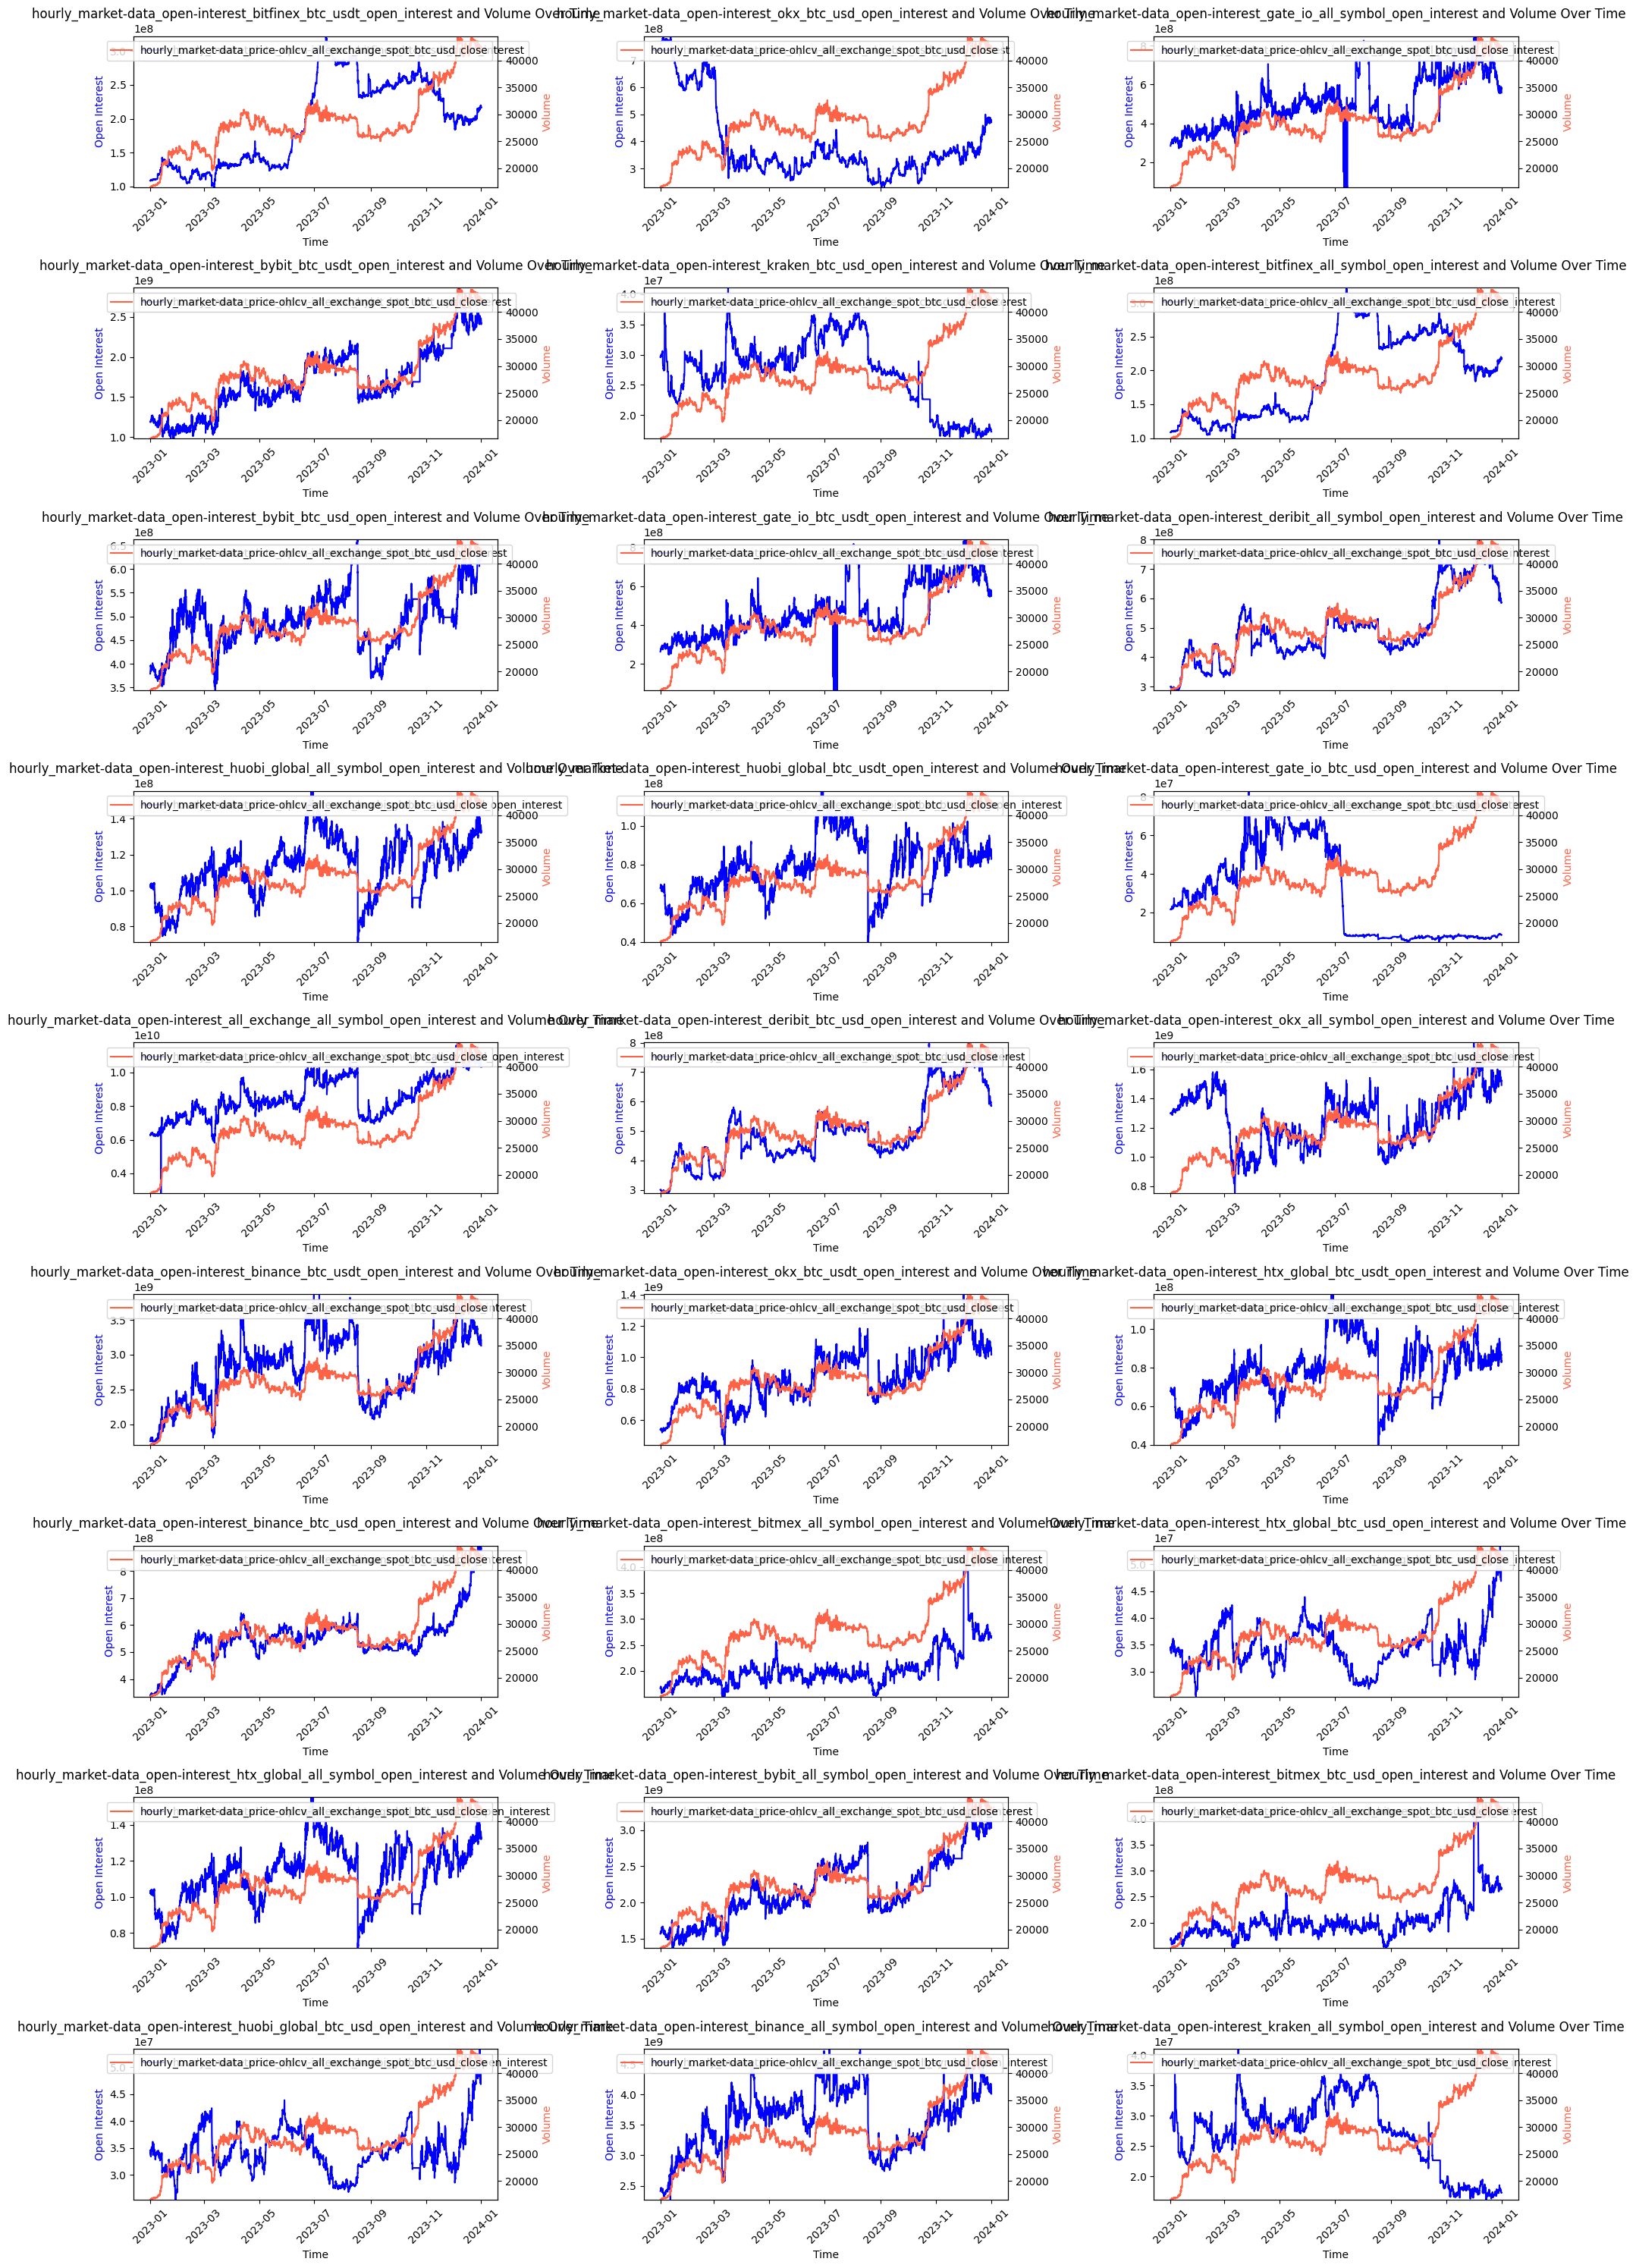

In [29]:
# 서브플롯 설정
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for ax, col in zip(axes, open_columns):
    sns.lineplot(x='ID', y=col, data=train_df, ax=ax, label=col, color='blue')  # 첫 번째 변수 그리기
    
    ax2 = ax.twinx()
    sns.lineplot(x='ID', y=price_columns[0], data=train_df, ax=ax2, color='tomato', label=price_columns[0])
    
    ax.set_ylim([train_df[col].min(), train_df[col].max()])  # 첫 번째 축의 범위 설정
    ax2.set_ylim([train_df[price_columns[0]].min(), train_df[price_columns[0]].max()])  # 두 번째 축의 범위 설정
    
    ax.set_title(f'{col} and Volume Over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Open Interest', color='blue')
    ax2.set_ylabel('Volume', color='tomato')
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


**<font color = 'forestgreen'>유관해보이는 피처들</font>**<br>
1. hourly_market-data_open-interest_all_exchange_all_symbol_open_interest
2. hourly_market-data_open-interest_binance_btc_usd_open_interest
3. hourly_market-data_open-interest_okx_btc_usdt_open_interest
4. hourly_market-data_open-interest_deribit_btc_usd_open_interest
5. hourly_market-data_open-interest_deribit_all_symbol_open_interest

**<font color = 'forestgreen'>유관해보이는 피처들 종합(중복 제거)</font>**<br>
1. hourly_market-data_open-interest_all_exchange_all_symbol_open_interest
2. hourly_market-data_open-interest_binance_btc_usd_open_interest
3. hourly_market-data_open-interest_okx_btc_usdt_open_interest
4. hourly_market-data_open-interest_deribit_btc_usd_open_interest
5. hourly_market-data_open-interest_deribit_all_symbol_open_interest
6. hourly_market-data_open-interest_bybit_btc_usdt_open_interest
7. hourly_market-data_open-interest_bitfinex_btc_usdt_open_interest
8. hourly_market-data_open-interest_bybit_all_symbol_open_interest

### (4) 유관한 open-interest 변수들에 대해 차분과 변동률 피처 추가

In [227]:
# EDA 결과를 반영한 새로운 칼럼 그룹 생성 
imp_open_interest_columns = [
    'hourly_market-data_open-interest_all_exchange_all_symbol_open_interest',
    'hourly_market-data_open-interest_binance_btc_usd_open_interest',
    'hourly_market-data_open-interest_okx_btc_usdt_open_interest',
    'hourly_market-data_open-interest_deribit_btc_usd_open_interest',
    'hourly_market-data_open-interest_deribit_all_symbol_open_interest',
    'hourly_market-data_open-interest_bybit_btc_usdt_open_interest',
    'hourly_market-data_open-interest_bitfinex_btc_usdt_open_interest',
    'hourly_market-data_open-interest_bybit_all_symbol_open_interest'
]

In [228]:
# 변동성, 차분 피처 생성 함수 
def make_diff_change_feature(df, columns_list, fill_method=['ffill', 'bfill']):
    """
    주어진 변수들에 대한 변동성, 차분 피처를 생성하고, 결측값을 처리하는 함수
    
    Parameters:
    - df: 데이터프레임
    - columns_list: 변동성과 차분 피처를 추가하고자 하는 열 이름 목록
    - fill_method: 결측값을 처리할 방법 (기본값은 'ffill', 앞쪽 채우기)
    
    Returns:
    - 변동성과 차분 피처가 추가된 데이터프레임과 추가된 열 목록
    """  

    new_features = {}  # 새로 추가할 열을 저장할 딕셔너리
    diff_pct_columns = []  # 새로 생성된 피처 이름들을 저장할 리스트
    
    for col in columns_list:
        if col in df.columns:
            pct_change_col = f'{col}_pct_change'
            diff_col = f'{col}_diff'
            
            # 피처 생성
            new_features[pct_change_col] = df[col].pct_change(fill_method=None)
            new_features[diff_col] = df[col].diff()
            
            # 생성된 피처 이름 저장
            diff_pct_columns.extend([pct_change_col, diff_col])
        else:
            print(f"Error: Cannot find '{col}' column")

            
    
    # 새로 생성된 피처를 데이터프레임으로 변환
    new_features_df = pd.DataFrame(new_features, index=df.index)

    # 결측값 처리 (ffill, bfill 모두 적용)
    for method in fill_method:
        if method == 'ffill':
            new_features_df = new_features_df.ffill()
        elif method == 'bfill':
            new_features_df = new_features_df.bfill()

    # 기존 데이터프레임에 추가
    df = pd.concat([df, new_features_df], axis=1)
    
    return df, diff_pct_columns

# 적용
train_df, diff_pct_columns = make_diff_change_feature(train_df, imp_open_interest_columns)  # 유관한 open-interest 변수들에 대한 변동성, 차분 피처를 생성
columns_groups_list.append(diff_pct_columns)  # 변수 그룹에 새 피처 추가 

## 3-3. 도메인 기반 피처 추가

### (1) 롱/숏 포지션 간 비율

In [231]:
def make_longshort_ratio_feature(df, long_col, short_col):
    """
    롱/숏 비율을 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - long_col: 롱(liquidations) 데이터가 저장된 열 이름
    - short_col: 숏(liquidations) 데이터가 저장된 열 이름
    
    Returns:
    - 롱/숏 비율을 저장한 열이 추가된 데이터프레임
    """
    df['long_short_ratio'] = df[long_col] / (df[short_col] + 1e-6)  # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더함
    return df

# 적용
train_df = make_longshort_ratio_feature(
    train_df, 
    'hourly_market-data_liquidations_deribit_all_symbol_long_liquidations', 
    'hourly_market-data_liquidations_deribit_all_symbol_short_liquidations'
)
domain_columns = ['long_short_ratio']

### (2) 거래량 대비 청산량

In [232]:
def make_liquidation_to_volume_ratio_feature(df, long_col, short_col, buy_volume_col, sell_volume_col):
    """
    청산/거래량 비율을 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - long_col: 롱(liquidations) 데이터가 저장된 열 이름
    - short_col: 숏(liquidations) 데이터가 저장된 열 이름
    - buy_volume_col: 매수 거래량이 저장된 열 이름
    - sell_volume_col: 매도 거래량이 저장된 열 이름
    
    Returns:
    - 청산/거래량 비율을 저장한 열이 추가된 데이터프레임
    """
    df['liquidation_to_volume_ratio'] = (
        (df[long_col] + df[short_col]) / 
        (df[buy_volume_col] + df[sell_volume_col] + 1e-6)  # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더함
    )
    return df

# 적용
train_df = make_liquidation_to_volume_ratio_feature(
    train_df,
    'hourly_market-data_liquidations_deribit_all_symbol_long_liquidations',
    'hourly_market-data_liquidations_deribit_all_symbol_short_liquidations',
    'hourly_market-data_taker-buy-sell-stats_binance_taker_buy_volume',
    'hourly_market-data_taker-buy-sell-stats_binance_taker_sell_volume'
)
domain_columns.append('liquidation_to_volume_ratio')

### (3) 청산 금액 비율 (USD 기준)

In [233]:
def make_liquidation_usd_ratio_feature(df, long_usd_col, short_usd_col):
    """
    청산된 USD 롱/숏 비율을 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - long_usd_col: 롱(liquidations) USD 데이터가 저장된 열 이름
    - short_usd_col: 숏(liquidations) USD 데이터가 저장된 열 이름
    
    Returns:
    - 청산된 USD 롱/숏 비율을 저장한 열이 추가된 데이터프레임
    """
    df['liquidation_usd_ratio'] = df[long_usd_col] / (df[short_usd_col] + 1e-6)  # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더함
    return df

# 적용
train_df = make_liquidation_usd_ratio_feature(
    train_df,
    'hourly_market-data_liquidations_deribit_all_symbol_long_liquidations_usd',
    'hourly_market-data_liquidations_deribit_all_symbol_short_liquidations_usd'
)
domain_columns.append('liquidation_usd_ratio')

### (4) 롱/숏 포지션과 펀딩 비율의 상관성

In [ ]:
def make_funding_rate_position_change_feature(df, funding_rate_col, long_liquidations_col, short_liquidations_col):
    """
    펀딩 비율과 롱/숏 포지션 차이를 곱하여 포지션 변화를 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - funding_rate_col: 펀딩 비율 데이터가 저장된 열 이름
    - long_liquidations_col: 롱 청산 데이터가 저장된 열 이름
    - short_liquidations_col: 숏 청산 데이터가 저장된 열 이름
    
    Returns:
    - 펀딩 비율에 따른 포지션 변화를 저장한 열이 추가된 데이터프레임
    """
    df['funding_rate_position_change'] = df[funding_rate_col] * (
        df[long_liquidations_col] - df[short_liquidations_col]
    )
    return df

# 적용
train_df = make_funding_rate_position_change_feature(
    train_df,
    'hourly_market-data_funding-rates_okx_funding_rates',
    'hourly_market-data_liquidations_deribit_all_symbol_long_liquidations',
    'hourly_market-data_liquidations_deribit_all_symbol_short_liquidations'
)
domain_columns.append('funding_rate_position_change')

### (5) 거래소 프리미엄 차이

In [ ]:
def make_premium_diff_feature(df, premium_gap_col, premium_index_col):
    """
    프리미엄 갭과 프리미엄 인덱스의 차이를 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - premium_gap_col: 프리미엄 갭 데이터가 저장된 열 이름
    - premium_index_col: 프리미엄 인덱스 데이터가 저장된 열 이름
    
    Returns:
    - 프리미엄 갭과 프리미엄 인덱스의 차이를 저장한 열이 추가된 데이터프레임
    """
    df['premium_diff'] = df[premium_gap_col] - df[premium_index_col]
    return df

# 적용
train_df = make_premium_diff_feature(
    train_df, 
    'hourly_market-data_coinbase-premium-index_coinbase_premium_gap', 
    'hourly_market-data_coinbase-premium-index_coinbase_premium_index'
)
domain_columns.append('premium_diff')

### (6) 해시레이트와 난이도 차이

In [ ]:
def make_hashrate_to_difficulty_feature(df, hashrate_col, difficulty_col):
    """
    해시레이트와 난이도 간의 비율을 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - hashrate_col: 해시레이트 데이터가 저장된 열 이름
    - difficulty_col: 난이도 데이터가 저장된 열 이름
    
    Returns:
    - 해시레이트와 난이도 비율을 저장한 열이 추가된 데이터프레임
    """
    df['hashrate_to_difficulty'] = df[hashrate_col] / (df[difficulty_col] + 1e-6)  # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더함
    return df

# 적용
train_df = make_hashrate_to_difficulty_feature(
    train_df, 
    'hourly_network-data_hashrate_hashrate', 
    'hourly_network-data_difficulty_difficulty'
)
domain_columns.append('hashrate_to_difficulty')

### (7) 비트코인 공급량 변화율

In [234]:
def make_supply_change_rate_feature(df, new_supply_col, total_supply_col):
    """
    공급 변화율을 계산하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - new_supply_col: 새로운 공급량 데이터가 저장된 열 이름
    - total_supply_col: 총 공급량 데이터가 저장된 열 이름
    
    Returns:
    - 공급 변화율을 저장한 열이 추가된 데이터프레임
    """
    df['supply_change_rate'] = df[new_supply_col] / (df[total_supply_col] + 1e-6)  # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더함
    return df

# 적용
train_df = make_supply_change_rate_feature(
    train_df, 
    'hourly_network-data_supply_supply_new', 
    'hourly_network-data_supply_supply_total'
)
domain_columns.append('supply_change_rate')

In [245]:
columns_groups_list.append(domain_columns)

## 3-4. Rolling(이동평균) 피처 추가

In [244]:
def make_multiple_rolling_features(df, exclude_columns_list):
    """
    여러 윈도우 크기(6, 12, 24, 48)로 이동평균 피처를 생성하고, 각 윈도우에 따른 변수명을 저장하는 함수
    
    Parameters:
    - df: 입력 데이터프레임
    - exclude_columns_list: 이동평균을 적용하지 않을 열 이름이 담긴 리스트
    
    Returns:
    - 이동평균 피처가 추가된 데이터프레임
    - 윈도우 크기에 따라 생성된 변수명 리스트들 (rolling_6_columns, rolling_12_columns 등)
    """
    rolling_features = {}

    # 윈도우 크기별로 변수명 리스트 생성
    rolling_columns_dict = {window: [] for window in [6, 12, 24, 48]}

    for col in df.columns:
        if col not in exclude_columns_list:
            for window in [6, 12, 24, 48]:
                new_col_name = f'{col}_rolling_mean_{window}h'
                rolling_features[new_col_name] = df[col].rolling(window=window).mean()
                # 윈도우 크기에 맞는 리스트에 변수명 저장
                rolling_columns_dict[window].append(new_col_name)

    # 새로운 피처를 한 번에 추가
    rolling_features_df = pd.DataFrame(rolling_features, index=df.index)
    df = pd.concat([df, rolling_features_df], axis=1)

    # 반환할 리스트들을 각각 별도로 반환
    rolling_6_columns = rolling_columns_dict.get(6, [])
    rolling_12_columns = rolling_columns_dict.get(12, [])
    rolling_24_columns = rolling_columns_dict.get(24, [])
    rolling_48_columns = rolling_columns_dict.get(48, [])

    return df, rolling_6_columns, rolling_12_columns, rolling_24_columns, rolling_48_columns


# 함수 사용 예시
train_df, rolling_6_columns, rolling_12_columns, rolling_24_columns, rolling_48_columns = make_multiple_rolling_features(train_df, date_columns + price_columns)
columns_groups_list.extend([rolling_6_columns, rolling_12_columns, rolling_24_columns, rolling_48_columns])  # 변수 그룹에 새 피처 추가 

In [246]:
train_df.shape

(8760, 1138)

In [248]:
len(columns_groups_list)

25